In [2]:
with open('classifier_0.pickle','rb') as f:
    classifier, z_train, z_test = pickle.load(f)

In [43]:
path_L, path_D, path_N=[], [], []
[path_L.append(path) for path in z_test if "L2" in path];
[path_D.append(path) for path in z_test if "D1" in path];
[path_N.append(path) for path in z_test if "N0" in path];
imgL=[cv2.imread(path,0).reshape(-1) for path in path_L]
imgD=[cv2.imread(path,0).reshape(-1) for path in path_D]
imgN=[cv2.imread(path,0).reshape(-1) for path in path_N]

In [5]:
predict_L=classifier.predict(imgL)
predict_D=classifier.predict(imgD)
predict_N=classifier.predict(imgN)

In [44]:
path_L=list(map(lambda path: path[:path.find("FUNIST")]+"FUNIST100\\"+path[path.find("L2"):] ,path_L))
path_D=list(map(lambda path: path[:path.find("FUNIST")]+"FUNIST100\\"+path[path.find("D1"):] ,path_D))
path_N=list(map(lambda path: path[:path.find("FUNIST")]+"FUNIST100\\"+path[path.find("N0"):] ,path_N))

In [60]:
def show_prediction(lab,nrow,ncol):
    path_list=[]
    [path_list.append(path) for path in z_test[0:nrow*ncol] if lab in path];
    img=[cv2.imread(path,0).reshape(-1) for path in path_list]
    predict=classifier.predict(img)
    path_list=list(map(lambda path: path[:path.find("FUNIST")]+"FUNIST100\\"+path[path.find(lab):], path_list))
    
    k=0
    label={0:'Null',1:'Dead',2:'Live'}
    plt.figure(figsize=(2.2*ncol,3*nrow))
    for i in range(0,nrow,1):
        for j in range(0,ncol,1):
            plt.subplot(nrow,ncol,k+1)
            plt.imshow(cv2.imread(path_L[k],0), cmap='gray')
            plt.xticks([])
            plt.yticks([])
            if(predict_L[k]==2):
                plt.title("Answer:"+lab+",\nPredict:"+label[predict_L[k]],color='blue')
            else:
                plt.title("Answer:"+lab+",\nPredict:"+label[predict_L[k]],color='red')
            k=k+1
    plt.tight_layout()
    plt.show()

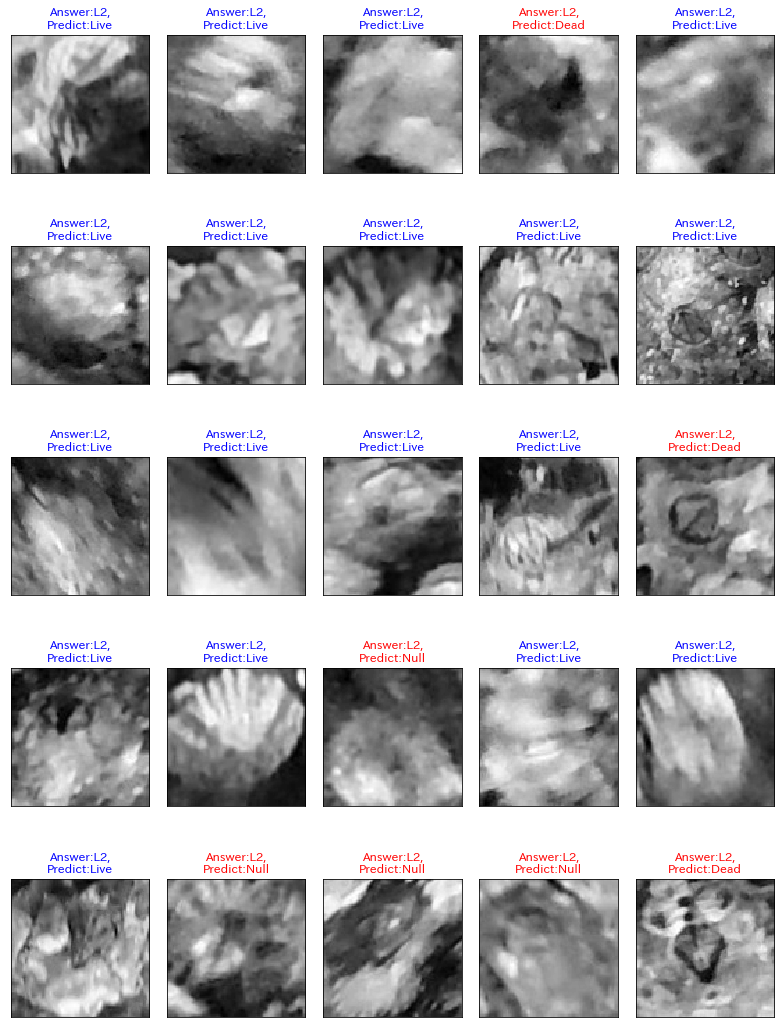

Wall time: 1.73 s


In [61]:
show_prediction("L2",5,5)

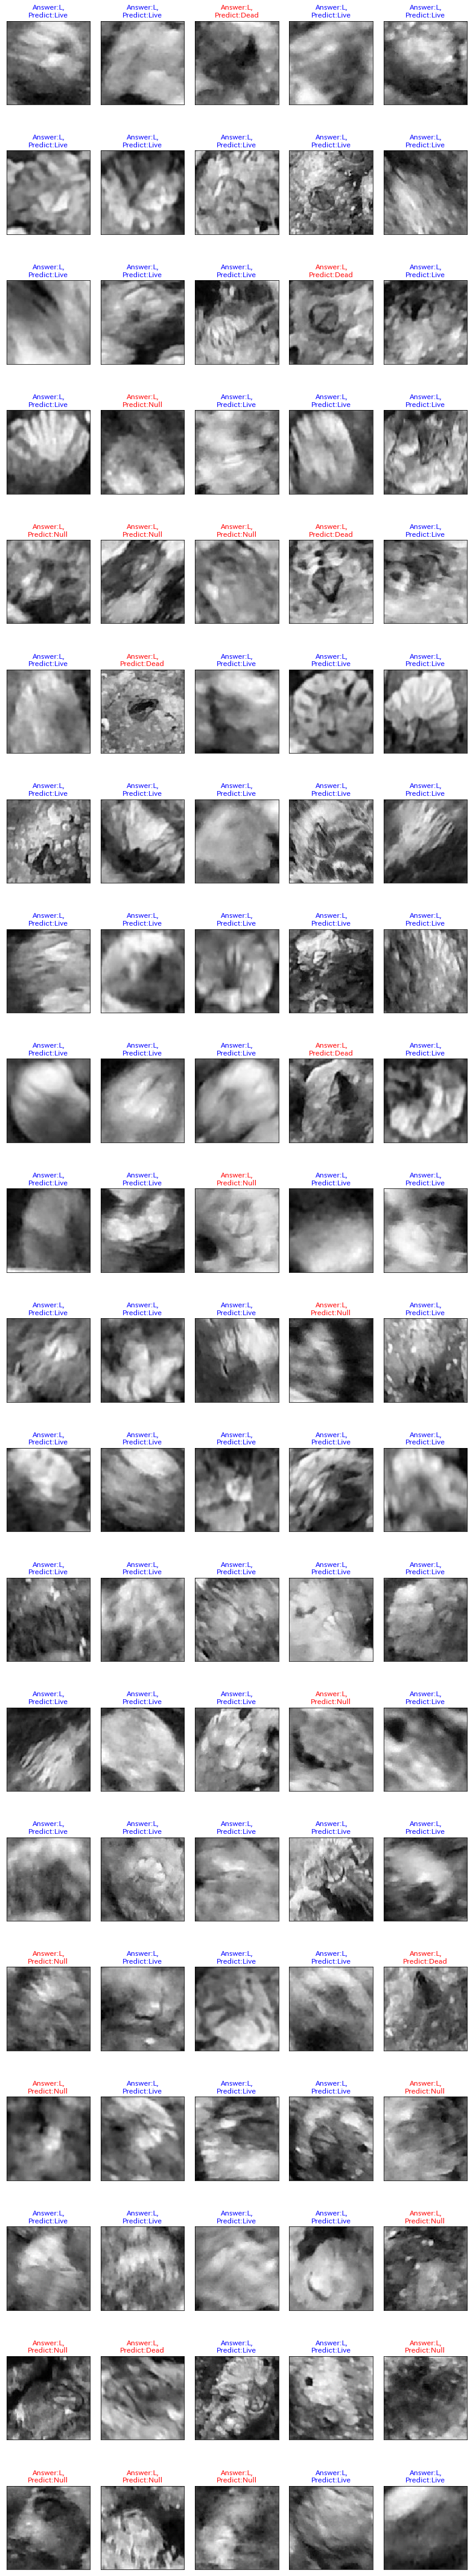

In [29]:
#100枚の画像を抽出して、AnswerとPredictを例示
nrow=20
ncol=5
k=1
label={0:'Null',1:'Dead',2:'Live'}
plt.figure(figsize=(2.2*ncol,3*nrow))
for i in range(0,nrow,1):
    for j in range(0,ncol,1):
        plt.subplot(nrow,ncol,k)
        plt.imshow(cv2.imread(path_L[k],0), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        if(predict_L[k]==2):
            plt.title("Answer:L,\nPredict:"+label[predict_L[k]],color='blue')
        else:
            plt.title("Answer:L,\nPredict:"+label[predict_L[k]],color='red')
        k=k+1
        
plt.tight_layout()
plt.show()

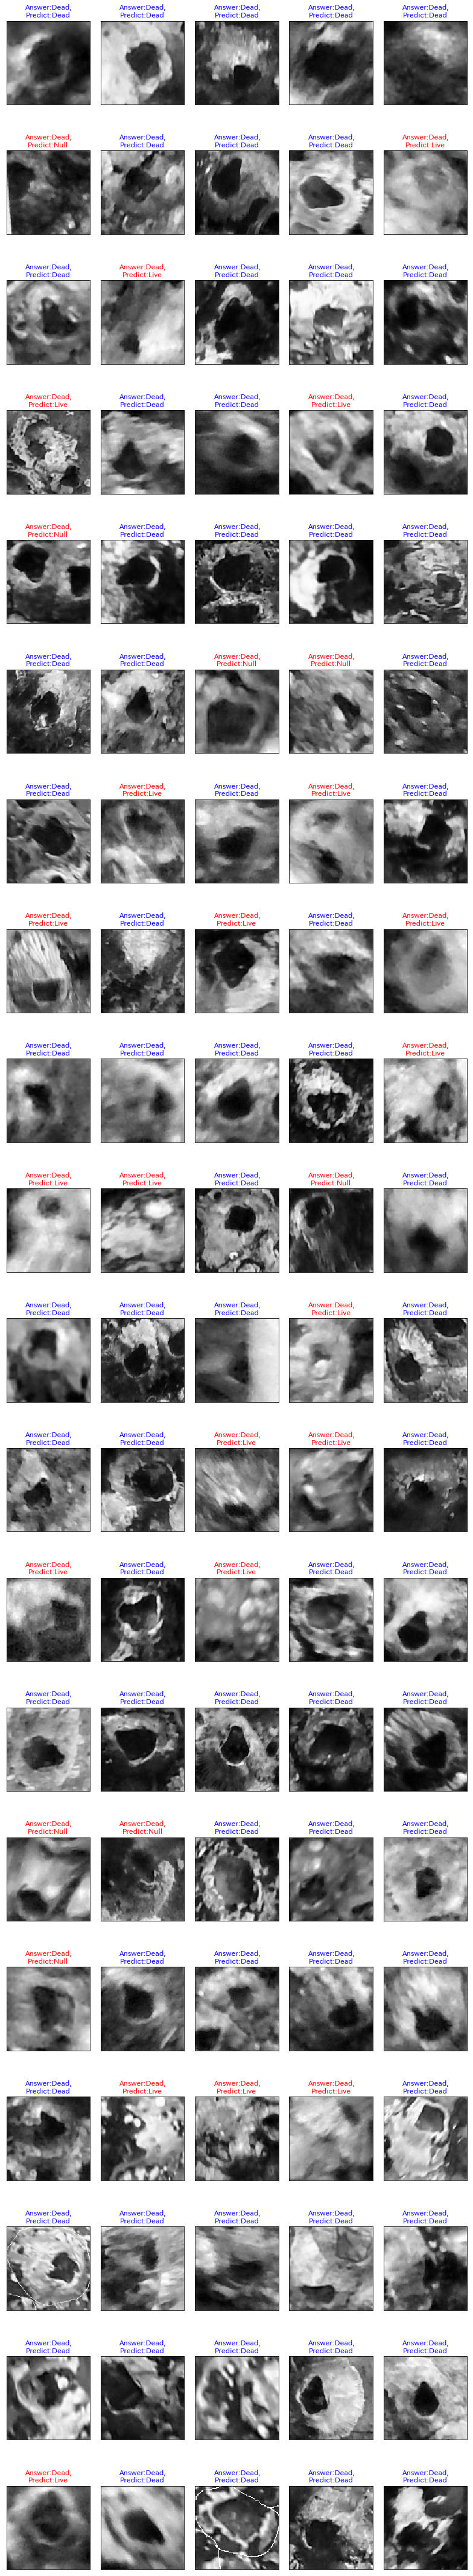

In [65]:
#100枚の画像を抽出して、AnswerとPredictを例示
nrow=20
ncol=5
k=1
label={0:'Null',1:'Dead',2:'Live'}
plt.figure(figsize=(2.2*ncol,3*nrow))
for i in range(0,nrow,1):
    for j in range(0,ncol,1):
        plt.subplot(nrow,ncol,k)
        plt.imshow(cv2.imread(path_D[k],0), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        if(predict_D[k]==1):
            plt.title("Answer:Dead,\nPredict:"+label[predict_D[k]],color='blue')
        else:
            plt.title("Answer:Dead,\nPredict:"+label[predict_D[k]],color='red')
        k=k+1
        
plt.tight_layout()
plt.show()

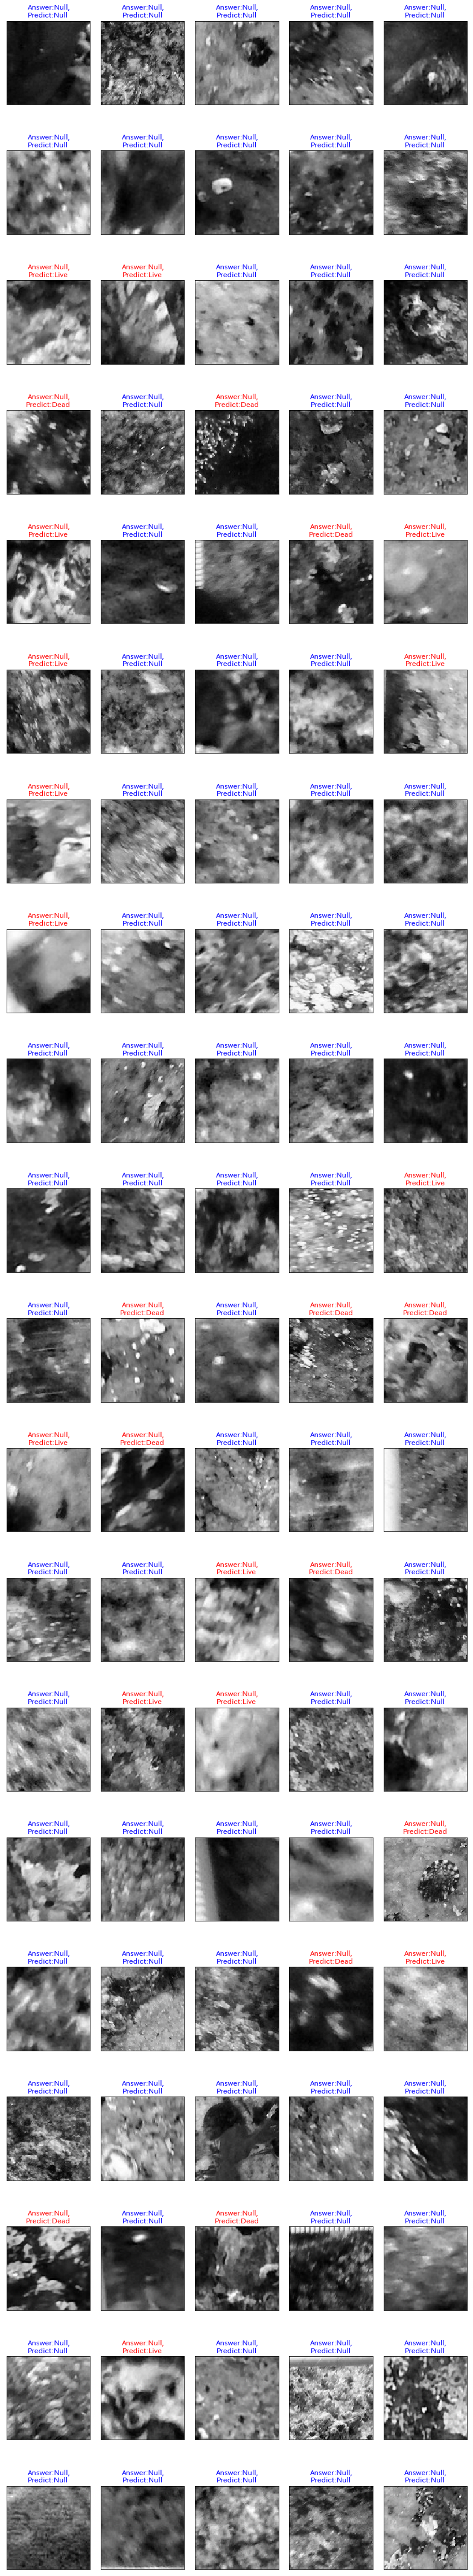

In [66]:
#100枚の画像を抽出して、AnswerとPredictを例示
nrow=20
ncol=5
k=1
label={0:'Null',1:'Dead',2:'Live'}
plt.figure(figsize=(2.2*ncol,3*nrow))
for i in range(0,nrow,1):
    for j in range(0,ncol,1):
        plt.subplot(nrow,ncol,k)
        plt.imshow(cv2.imread(path_N[k],0), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        if(predict_N[k]==0):
            plt.title("Answer:Null,\nPredict:"+label[predict_N[k]],color='blue')
        else:
            plt.title("Answer:Null,\nPredict:"+label[predict_N[k]],color='red')
        k=k+1
        
plt.tight_layout()
plt.show()